# **LAB 2**
## **Multi Layer Perceptrons (MLP)**
Objective: create  neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras
Refer: https://keras.io/about/

### MLP Structure


*   Each MLP model is consisted of one input layer, several hidden layers, and one output layer
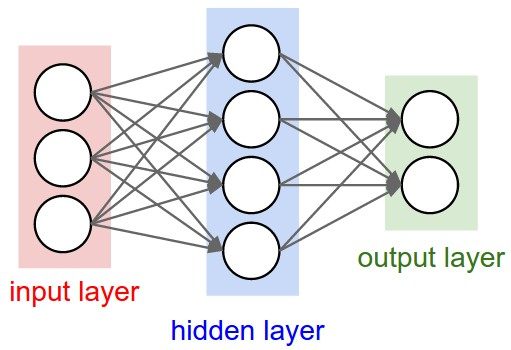



*   Number of input neurons: 3
*   Number of hidden neurons: 4
*   Number of output neurons: 2
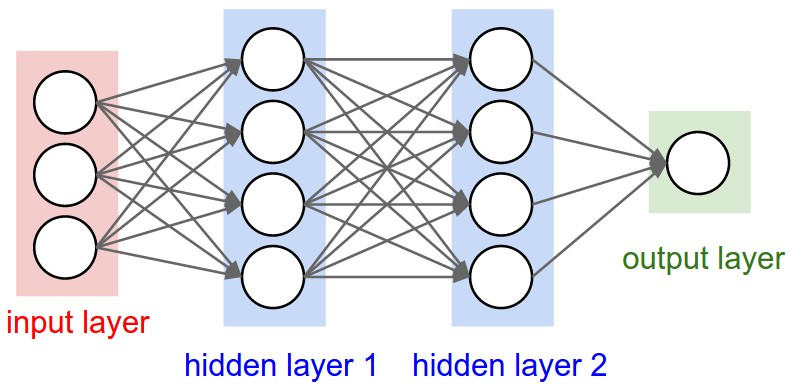

## MLP for Regression tasks
* When the target (y) is continuous (real)
* For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [116]:
#Import dataset from the Keras Library and load data
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


## Model Creation: Work Flow


*   Prepare data
*   Split data
*   Create model
*  Compile the model
*  Fit the model
* Predict result for unknown value
* Evaluate the model 
* Freeze Modify or choose a new algorithm



## Dataset Description


*   Boston housing dataset has total 506 data instances (404 training & 102 test)
* 13 attributes (features) to predict "the median values of the houses at a location"

This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

Refer: https://keras.io/api/datasets/boston_housing/ 



**1,2) Dataset Preparation**

In [117]:
#Display the dataset shape
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (404, 13)
Test shape (102, 13)
(404,)
(102,)


### **3) Model Creation**

In [118]:
from tensorflow.keras.models import Sequential
model=Sequential()

**3-1. Adding layers**


*   Keras layers can be added to the model
*    Adding layers are like stacking lego blocks one by one
Refer: https://keras.io/api/layers/core_layers/



In [5]:
from tensorflow.keras.layers import Activation, Dense

In [120]:
from tensorflow.keras.layers import Activation, Dense
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (13,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem

In [121]:
# This is equivalent to the above code block
model.add(Dense(10, input_shape = (13,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

In [122]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                140       
                                                                 
 activation_9 (Activation)   (None, 10)                0         
                                                                 
 dense_57 (Dense)            (None, 10)                110       
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                

 **param_number = output_neurons * (input_neurons+ 1)**

**3-2 Model compile**

* Keras model should be "compiled" prior to training
* Types of loss (function) and optimizer should be designated

Refer: 
 (optimizers): https://keras.io/optimizers/
 
  (losses): https://keras.io/losses/


In [123]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed



**4-Training** 

In [124]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)


Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 355.5249 - mse: 355.5249
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 100.3636 - mse: 100.3636
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 85.0444 - mse: 85.0444
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 85.7410 - mse: 85.7410
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 85.1361 - mse: 85.1361
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 85.1017 - mse: 85.1017
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 85.0184 - mse: 85.0184
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 84.9957 - mse: 84.9957
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 85.2880 - mse: 85.2880
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 84.9867 - mse: 84.9867
Epoch 11/100
9/9 [==============================] - 0s 

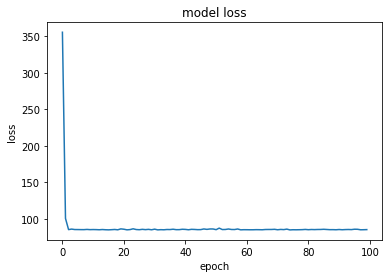

In [125]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

**5-Evaluation** 
* Keras model can be evaluated with evaluate() function
* Evaluation results are contained in a list

Refer: https://keras.io/metrics/

In [126]:
results = model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 3ms/step - loss: 85.5015 - mse: 85.5015


In [127]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed


['loss', 'mse']
[85.50147247314453, 85.50147247314453]


In [128]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  85.50147247314453
mse:  85.50147247314453


## **Experiments to do:**
|
1.  Change the activation functions for the above model and write down your observations.
2.  Change the epochs ( reduce and increase) for the above model and write down your observations.
3.  Create a MLP model to classify IRIS dataset. Download dataset from here: http://archive.ics.uci.edu/ml/index.php . 

     --> Create MLP models with 1,3,5 hidden layers and give your inferences
4. **Odd Numbers:** Create a sequential model to classify the MNIST dataset: https://keras.io/api/datasets/mnist/ 
     
  **Even Numbers:**  Create a sequential model to classify the CIFAR10 dataset: https://keras.io/api/datasets/cifar10/ : 

   **4.1** USe the following Archetecture and run for 100 epochs:

      Input layer- 50 Neurons

      Hidden 1    - 50 Neurons

      Hidden 2    - 50 Neurons

      Output
    
  **4.2** Add more hidden layers and execute for different epochs and note down your inferences.




# Answers:

## 1.

In [1]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
#Display the dataset shape
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (404, 13)
Test shape (102, 13)
(404,)
(102,)


In [3]:
from tensorflow.keras.models import Sequential
model=Sequential()

### Adding input, hidden, output layers and defining the activation function[link text](https://)

In [6]:
model.add(Dense(10, input_shape = (13,), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


### Compiling

In [8]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

### Training

In [9]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 200, verbose = 1)

Epoch 1/200
9/9 [==============================] - 3s 9ms/step - loss: nan - mse: nan        
Epoch 2/200
9/9 [==============================] - 0s 11ms/step - loss: nan - mse: nan
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: nan - mse: nan
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: nan - mse: nan
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 9/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 11/200
9/9 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 12/200
9/9 [=======================

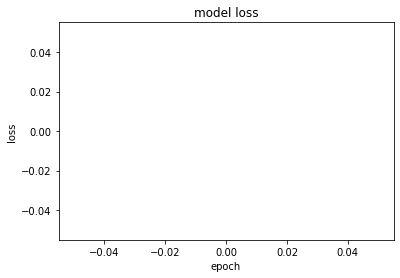

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
results = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: nan - mse: nan


In [15]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)   

['loss', 'mse']
[nan, nan]


In [16]:
print('loss: ', results[0])
print('mse: ', results[1])

loss:  nan
mse:  nan


In [17]:
from sklearn.metrics import accuracy_score

The Activation function used here is relu - rectified linear unit the loss reduces in a some what linear fashion. but in sigmoid it is like a rugged line. we can also say that the activation function mse is almost equal to 85 but in relu it equal to 88. the model whose mse close to 0 is good model

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.

### Increase epoch

In [162]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 200, verbose = 1)

Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6402 - mse: 84.6402
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6625 - mse: 84.6625
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6760 - mse: 84.6760
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 84.7514 - mse: 84.7514
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 84.7056 - mse: 84.7056
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6987 - mse: 84.6987
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 84.6675 - mse: 84.6675
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6853 - mse: 84.6853
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 84.7909 - mse: 84.7909
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 84.6936 - mse: 84.6936
Epoch 11/200
9/9 [==============================] - 0s 3ms/

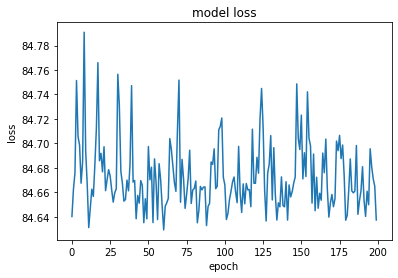

In [163]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [164]:
results = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 88.0798 - mse: 88.0798


In [165]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  

['loss', 'mse']
[88.07977294921875, 88.07977294921875]


### Decreasing epoch

In [166]:
history=model.fit(X_train, y_train, batch_size = 50, epochs = 10, verbose = 1)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6559 - mse: 84.6559
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6913 - mse: 84.6913
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6345 - mse: 84.6345
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6719 - mse: 84.6719
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6722 - mse: 84.6722
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6779 - mse: 84.6779
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6671 - mse: 84.6671
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6618 - mse: 84.6618
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 84.6818 - mse: 84.6818
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 84.6529 - mse: 84.6529


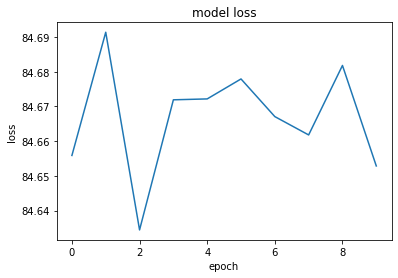

In [167]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [168]:
results = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 88.2561 - mse: 88.2561


In [169]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)  

['loss', 'mse']
[88.25611114501953, 88.25611114501953]


if we increase the epoch the MSE reduces but if we increase the eppoch the MSE increases

## 3.

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation



In [175]:
df = pd.read_csv (r'/content/drive/MyDrive/DL and NN/Lab 1/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [176]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [178]:
df1 = df.drop(['Id'], axis=1)
df1['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=[1, -1, -1], inplace=True)

df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


In [179]:
y1 = df1[['Species']]
y1

,Species
0,1
1,1
2,1
3,1
4,1
...,...
145,-1
146,-1
147,-1
148,-1


In [182]:
X1 = np.array(df1[['SepalLengthCm','SepalWidthCm',  'PetalLengthCm','PetalWidthCm']])

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [203]:
print("Train shape",X_train.shape)
print("Test shape",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Train shape (100, 4)
Test shape (50, 4)
(100, 1)
(50, 1)


In [211]:
modelIR=Sequential()

In [212]:
modelIR.add(Dense(10, input_shape = (4,), activation = 'sigmoid'))
modelIR.add(Dense(10, activation = 'sigmoid'))
modelIR.add(Dense(1))

In [213]:
modelIR.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 10)                50        
                                                                 
 dense_88 (Dense)            (None, 10)                110       
                                                                 
 dense_89 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [214]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
modelIR.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed



In [215]:
train1=modelIR.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 1.2939 - mse: 1.2939
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 1.1765 - mse: 1.1765
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 1.0897 - mse: 1.0897
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 1.0306 - mse: 1.0306
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9851 - mse: 0.9851
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9537 - mse: 0.9537
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9300 - mse: 0.9300
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9129 - mse: 0.9129
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9020 - mse: 0.9020
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8916 - mse: 0.8916
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8856 

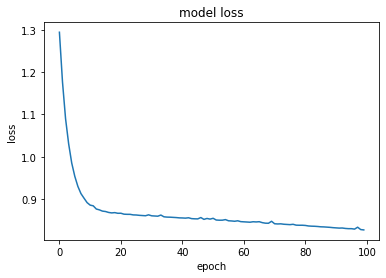

In [216]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(train1.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [231]:
results = modelIR.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.9298 - mse: 0.9298


In [232]:
print(modelIR.metrics_names)     # list of metric names the model is employing
print(results)  

['loss', 'mse']
[0.9298476576805115, 0.9298476576805115]


### three hidden layers

In [224]:
modelIR2=Sequential()

In [225]:
modelIR2.add(Dense(10, input_shape = (4,), activation = 'sigmoid'))
modelIR2.add(Dense(10, activation = 'sigmoid'))
modelIR2.add(Dense(10, activation = 'sigmoid'))
modelIR2.add(Dense(10, activation = 'sigmoid'))
modelIR2.add(Dense(1))

In [227]:
modelIR2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 10)                50        
                                                                 
 dense_96 (Dense)            (None, 10)                110       
                                                                 
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 dense_98 (Dense)            (None, 10)                110       
                                                                 
 dense_99 (Dense)            (None, 1)                 11        
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [239]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
modelIR2.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

In [240]:
train2=modelIR2.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8529 - mse: 0.8529
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8520 - mse: 0.8520
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8520 - mse: 0.8520
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8523 - mse: 0.8523
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8537 - mse: 0.8537
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8520 - mse: 0.8520
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8548 - mse: 0.8548
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8520 - mse: 0.8520
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8528 - mse: 0.8528
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8537 - mse: 0.8537
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8519 

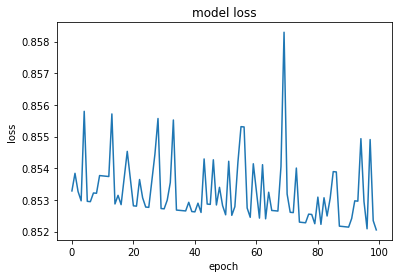

In [236]:
import matplotlib.pyplot as plt
plt.plot(train2.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [241]:
results = modelIR2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.9571 - mse: 0.9571


In [242]:
print(modelIR2.metrics_names)     # list of metric names the model is employing
print(results) 

['loss', 'mse']
[0.9571046233177185, 0.9571046233177185]


### five hidden layers

In [243]:
modelIR3=Sequential()

In [244]:
modelIR3.add(Dense(10, input_shape = (4,), activation = 'sigmoid'))
modelIR3.add(Dense(10, activation = 'sigmoid'))
modelIR3.add(Dense(10, activation = 'sigmoid'))
modelIR3.add(Dense(10, activation = 'sigmoid'))
modelIR3.add(Dense(10, activation = 'sigmoid'))
modelIR3.add(Dense(10, activation = 'sigmoid'))
modelIR3.add(Dense(1))

In [245]:
modelIR3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 10)                50        
                                                                 
 dense_101 (Dense)           (None, 10)                110       
                                                                 
 dense_102 (Dense)           (None, 10)                110       
                                                                 
 dense_103 (Dense)           (None, 10)                110       
                                                                 
 dense_104 (Dense)           (None, 10)                110       
                                                                 
 dense_105 (Dense)           (None, 10)                110       
                                                                 
 dense_106 (Dense)           (None, 1)               

In [252]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
modelIR3.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

In [254]:
train3=modelIR3.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8564 - mse: 0.8564
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8581 - mse: 0.8581
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8564 - mse: 0.8564
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8560 - mse: 0.8560
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8572 - mse: 0.8572
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8565 - mse: 0.8565
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8564 - mse: 0.8564
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8564 - mse: 0.8564
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8572 - mse: 0.8572
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8557 - mse: 0.8557
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8557 

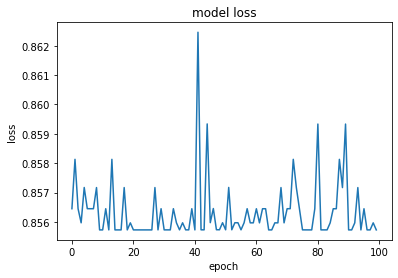

In [255]:
import matplotlib.pyplot as plt
plt.plot(train3.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [256]:
results = modelIR3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.9620 - mse: 0.9620


In [257]:
print(modelIR3.metrics_names)     # list of metric names the model is employing
print(results) 

['loss', 'mse']
[0.9620286822319031, 0.9620286822319031]


All the three methods are good as the mse value is close to 0

## 4

In [1]:

from tensorflow.keras.datasets import cifar10
(X_train4, y_train4), (X_test4, y_test4) = cifar10.load_data()

KeyboardInterrupt: 

In [260]:
print("Train shape",X_train4.shape)
print("Test shape",X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

Train shape (50000, 32, 32, 3)
Test shape (10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [279]:
y_train4

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [309]:
model4=Sequential()

In [310]:
model4.add(Dense(10, input_shape = (32,32,3,), activation = 'sigmoid'))
model4.add(Dense(10, activation = 'sigmoid'))
model4.add(Dense(10, activation = 'sigmoid'))
model4.add(Dense(1))

In [311]:
model4.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 32, 32, 10)        40        
                                                                 
 dense_144 (Dense)           (None, 32, 32, 10)        110       
                                                                 
 dense_145 (Dense)           (None, 32, 32, 10)        110       
                                                                 
 dense_146 (Dense)           (None, 32, 32, 1)         11        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [312]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)    # stochastic gradient descent optimizer
model4.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])

In [ ]:
history=model4.fit(X_train4, y_train4, batch_size = None, epochs = 100, verbose = 1)

Epoch 1/100
 335/1563 [=====>........................] - ETA: 14s - loss: 8.2256 - mse: 8.2256